In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_excel('Covid cases in India.xlsx')

In [4]:
df.head(4)

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3


In [5]:
df.drop(['S. No.'], axis = 'columns', inplace = True)

In [6]:
df.head(2)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0


In [7]:
df['Total Cases']  = df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [8]:
df.head(3)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39


In [9]:
print('The total number of cases uptill now in India is ',df['Total Cases'].sum())

The total number of cases uptill now in India is  729


In [10]:
df['Active cases'] = df['Total Cases']-(df['Cured']+df['Death'])

In [11]:
df.head(2)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6


In [12]:
#Find highest number of cases

In [13]:
df.style.background_gradient(cmap = 'Blues')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [14]:
# Grouping active cases w.r.t Area

In [15]:
act_area  = df.groupby('Name of State / UT')['Active cases'].sum().sort_values(ascending = False).to_frame()

In [16]:
act_area.style.background_gradient(cmap = 'Reds')

,Active cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


In [17]:
#Graphical representations

In [18]:
#builtin pandas

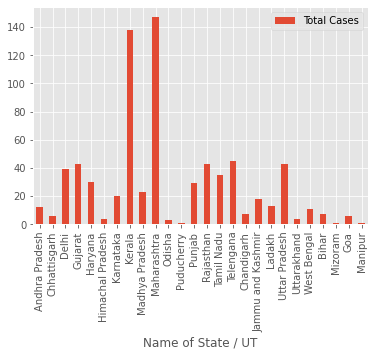

In [19]:
df.plot(kind = 'bar', x = 'Name of State / UT', y = 'Total Cases')

In [20]:
#Matplotlib

<BarContainer object of 26 artists>

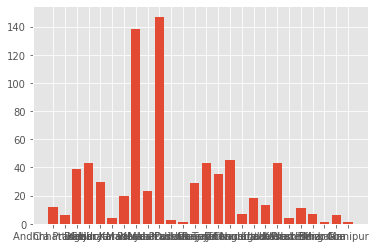

In [21]:
plt.bar(df['Name of State / UT'],df['Total Cases'])

In [22]:
# ^ crappy :/

In [23]:
# Lets use iplot

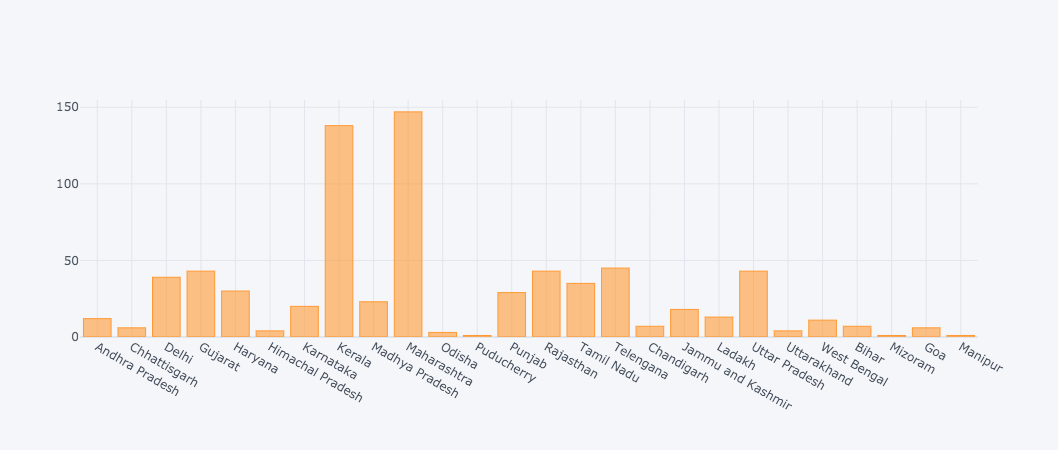

In [24]:
df.iplot(kind = 'bar', x = 'Name of State / UT', y = 'Total Cases')

In [25]:
# px express

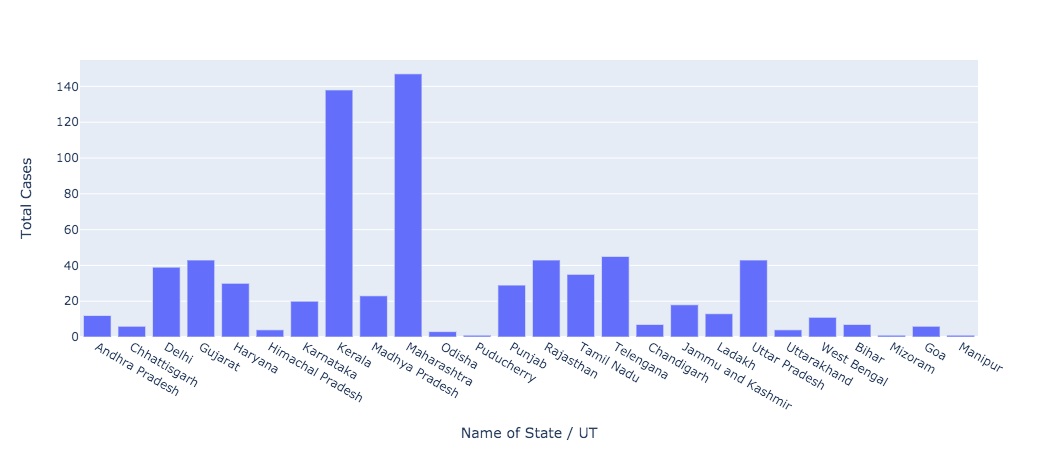

In [26]:
px.bar(df, x = 'Name of State / UT',y = 'Total Cases')

## Scatter 

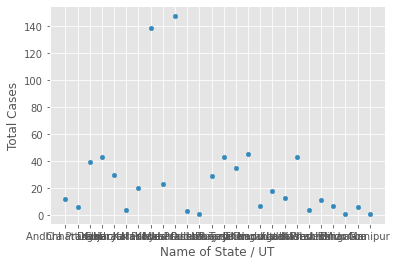

In [27]:
df.plot(kind = 'scatter', x = 'Name of State / UT', y = 'Total Cases')

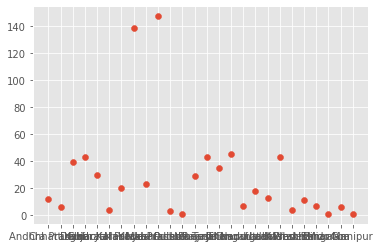

In [28]:
plt.scatter(df['Name of State / UT'],df['Total Cases'])

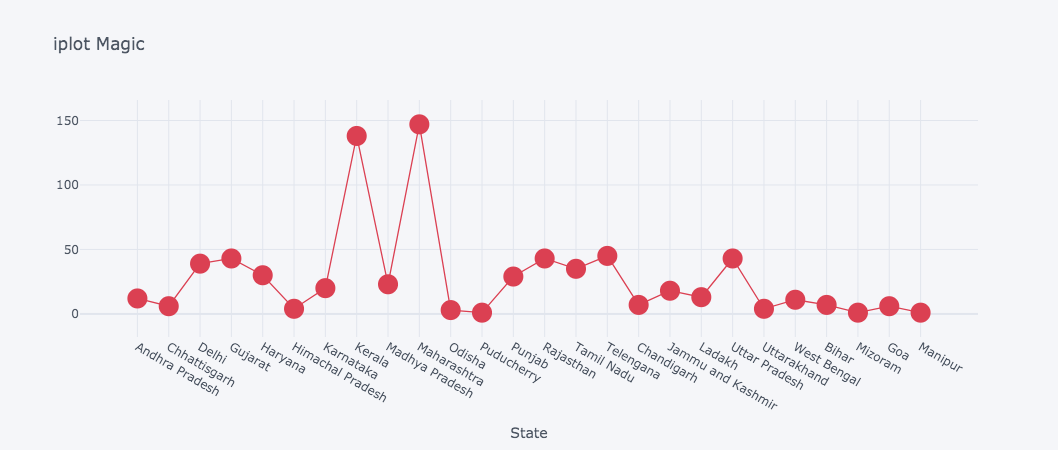

In [29]:
df.iplot(kind = 'scatter', x = 'Name of State / UT', y = 'Total Cases', mode = 'markers+lines', size = 20, colors = 'red', title = 'iplot Magic', xTitle = 'State')

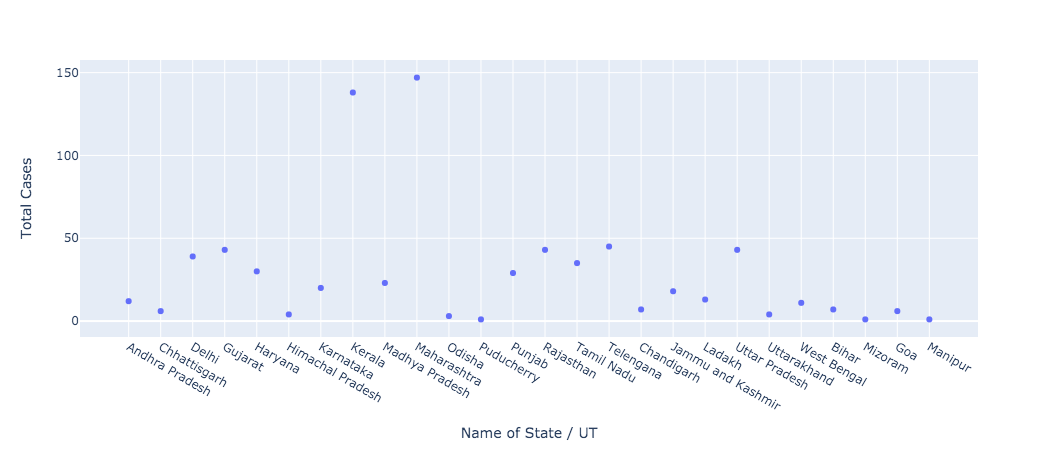

In [30]:
px.scatter(df, x = 'Name of State / UT',y = 'Total Cases')

#### Using object oriented methods to plot

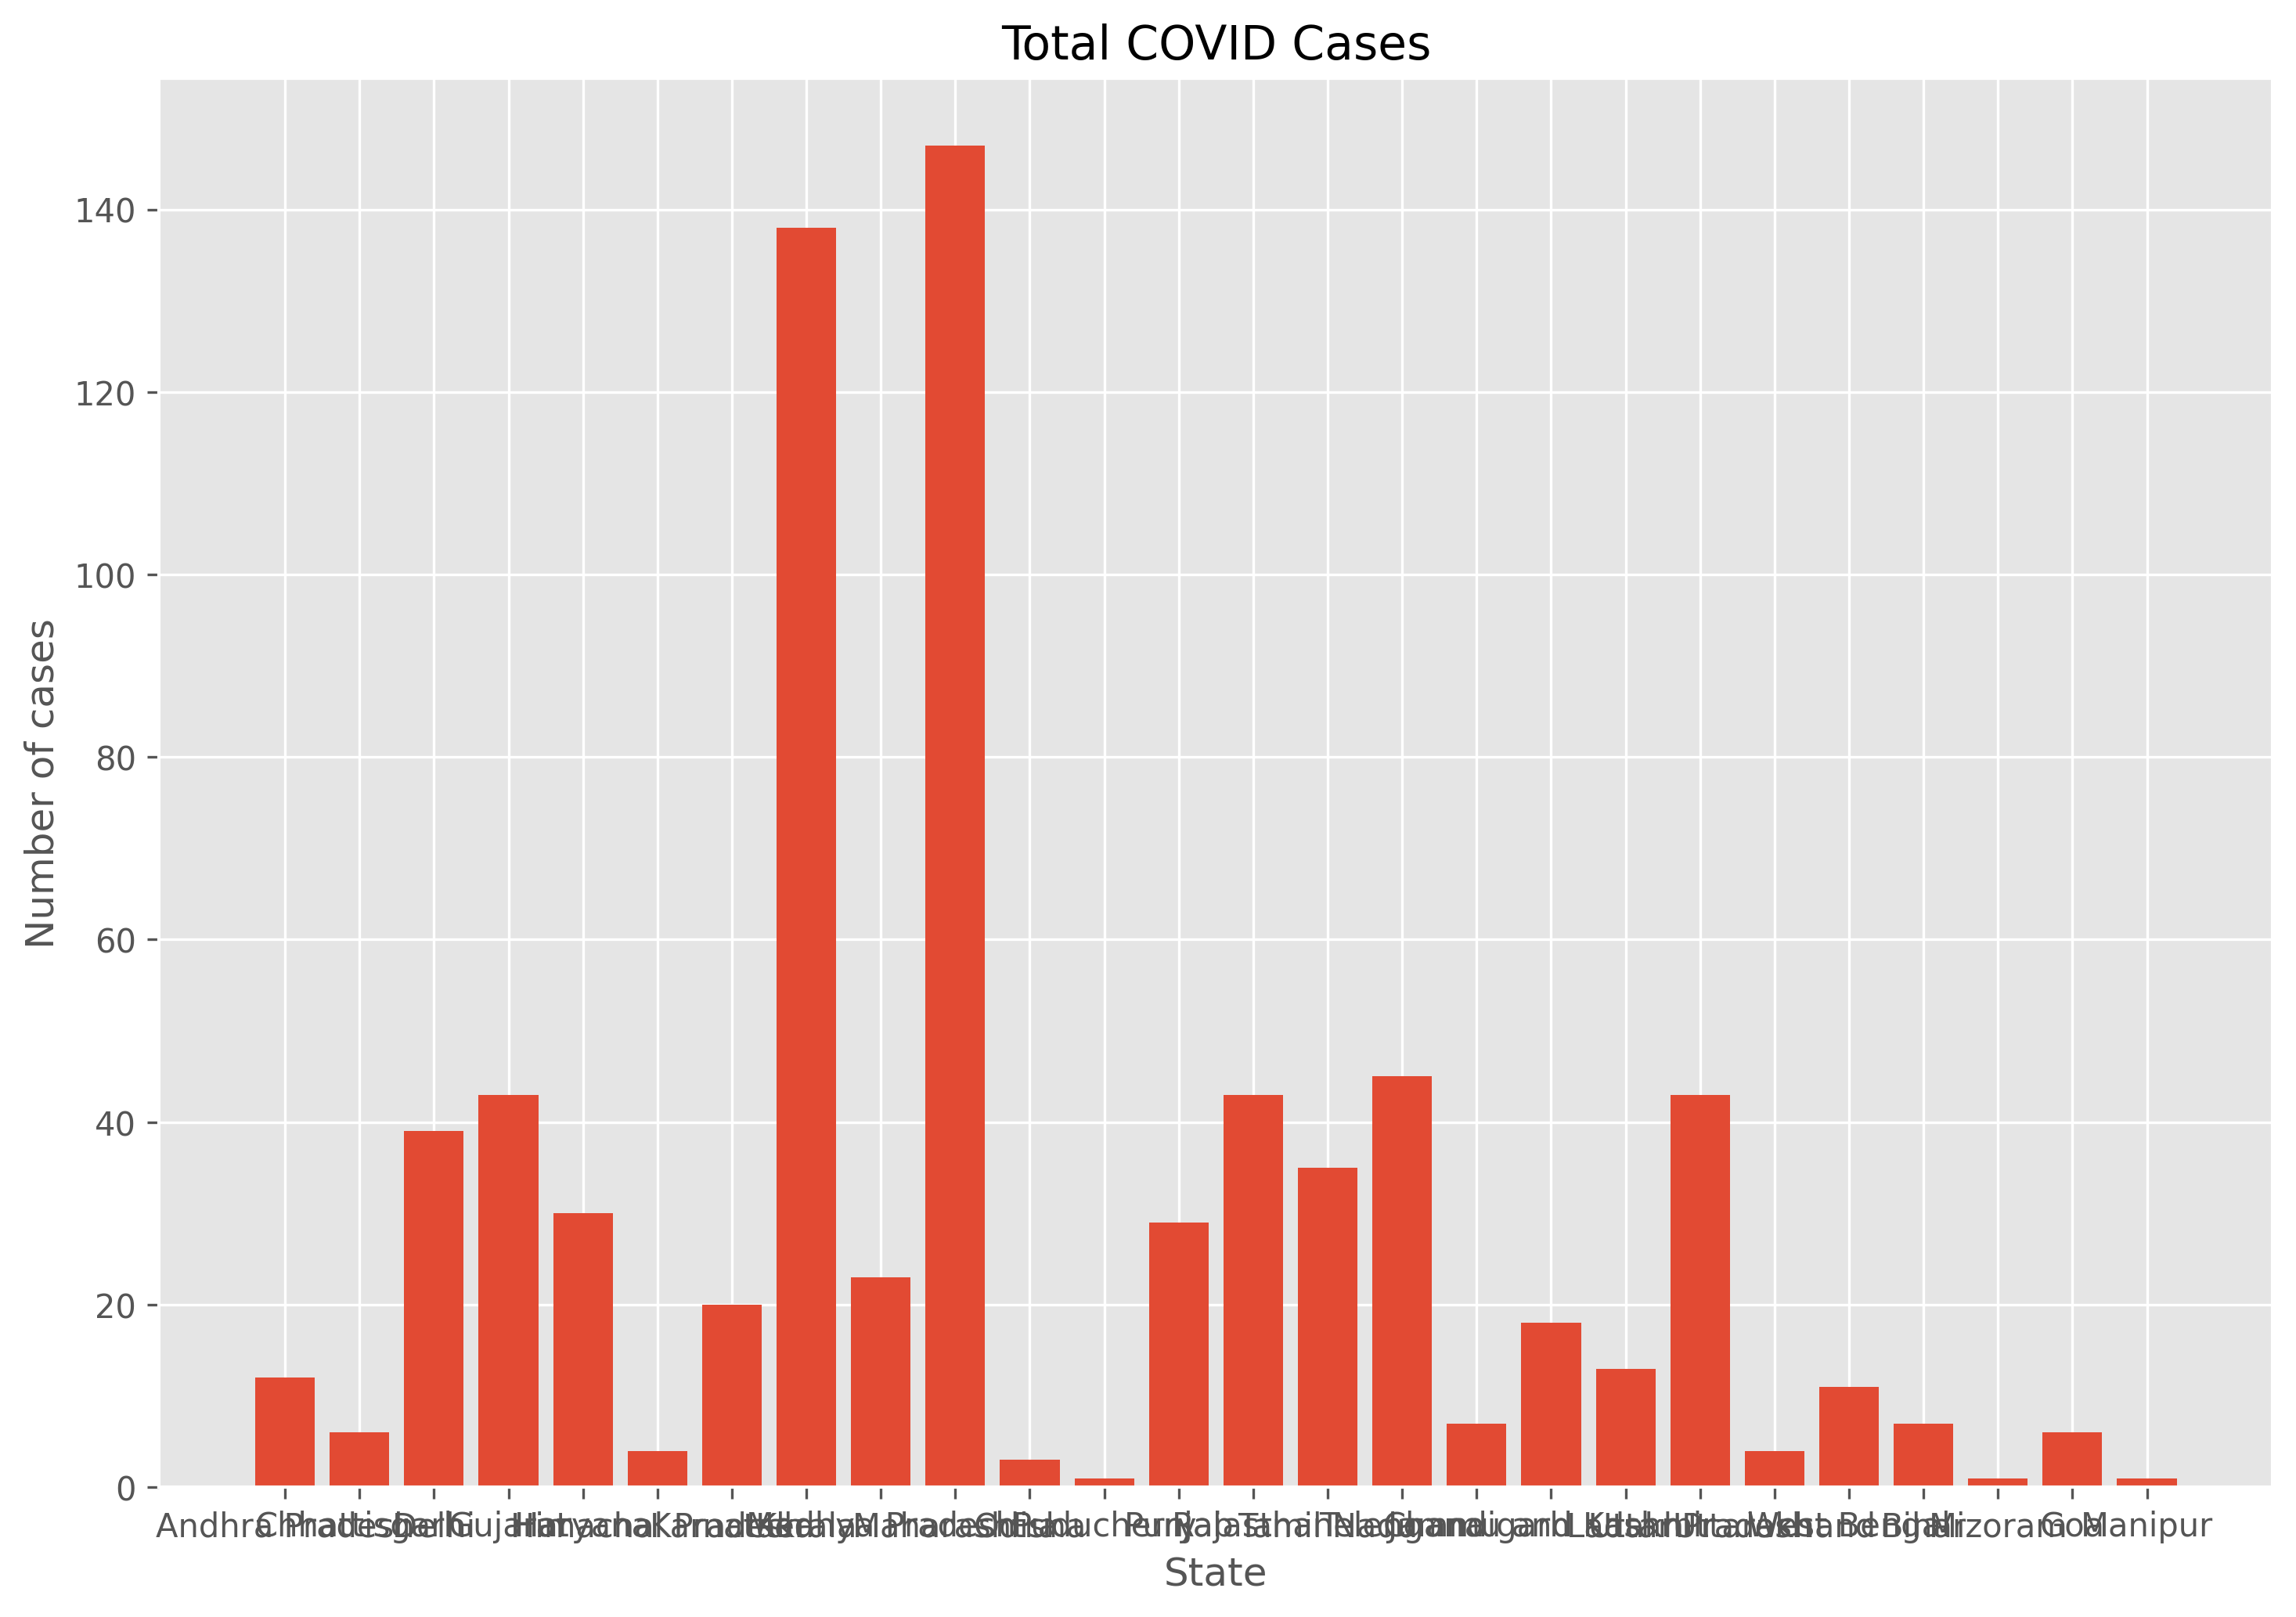

In [31]:
fig = plt.figure(figsize = (9,6), dpi = 300)
axes = fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title('Total COVID Cases')
axes.set_xlabel('State')
axes.set_ylabel('Number of cases')
plt.show()

#### plotly graph object

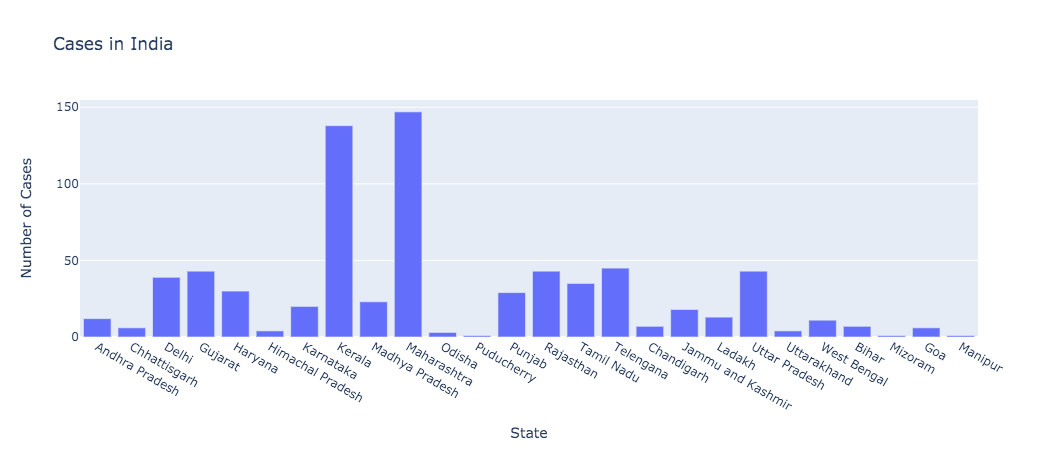

In [32]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df['Name of State / UT'], y = df['Total Cases']))
fig.update_layout(title='Cases in India', xaxis= dict(title='State'), yaxis=dict(title='Number of Cases'))

# Maps

In [33]:
i_cordinates = pd.read_excel('Indian Coordinates.xlsx')

In [34]:
df2 = pd.merge(df, i_cordinates, on = 'Name of State / UT')

In [35]:
df2.head(3)

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active cases,Latitude,Longitude
0,Andhra Pradesh,12,0,1,0,12,11,14.750429,78.570026
1,Delhi,38,1,6,1,39,32,28.669993,77.230004
2,Haryana,16,14,11,0,30,19,28.450006,77.019991


In [36]:
i_cordinates.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [37]:
map = folium.Map(location=[20,70], zoom_start=4, titles = 'Stamenterrain')
for lat,long,value, name in zip(df2['Latitude'], df2['Longitude'], df2['Total Cases'], df2['Name of State / UT']):
    folium.CircleMarker([lat,long], radius= value*0.8, popup=('<strong>State</strong>:'+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: '+str(value)+'<br>'), color = 'red', fill_color = 'red', fill_opacity = 0.3).add_to(map)

In [38]:
map

## Global Corona analysis

In [39]:
perday1 = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='India')
perday2 = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='Italy')
perday3 = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='Korea')
perday4 = pd.read_excel('per_day_cases.xlsx', parse_dates=True, sheet_name='Wuhan')

#### Matplotlib

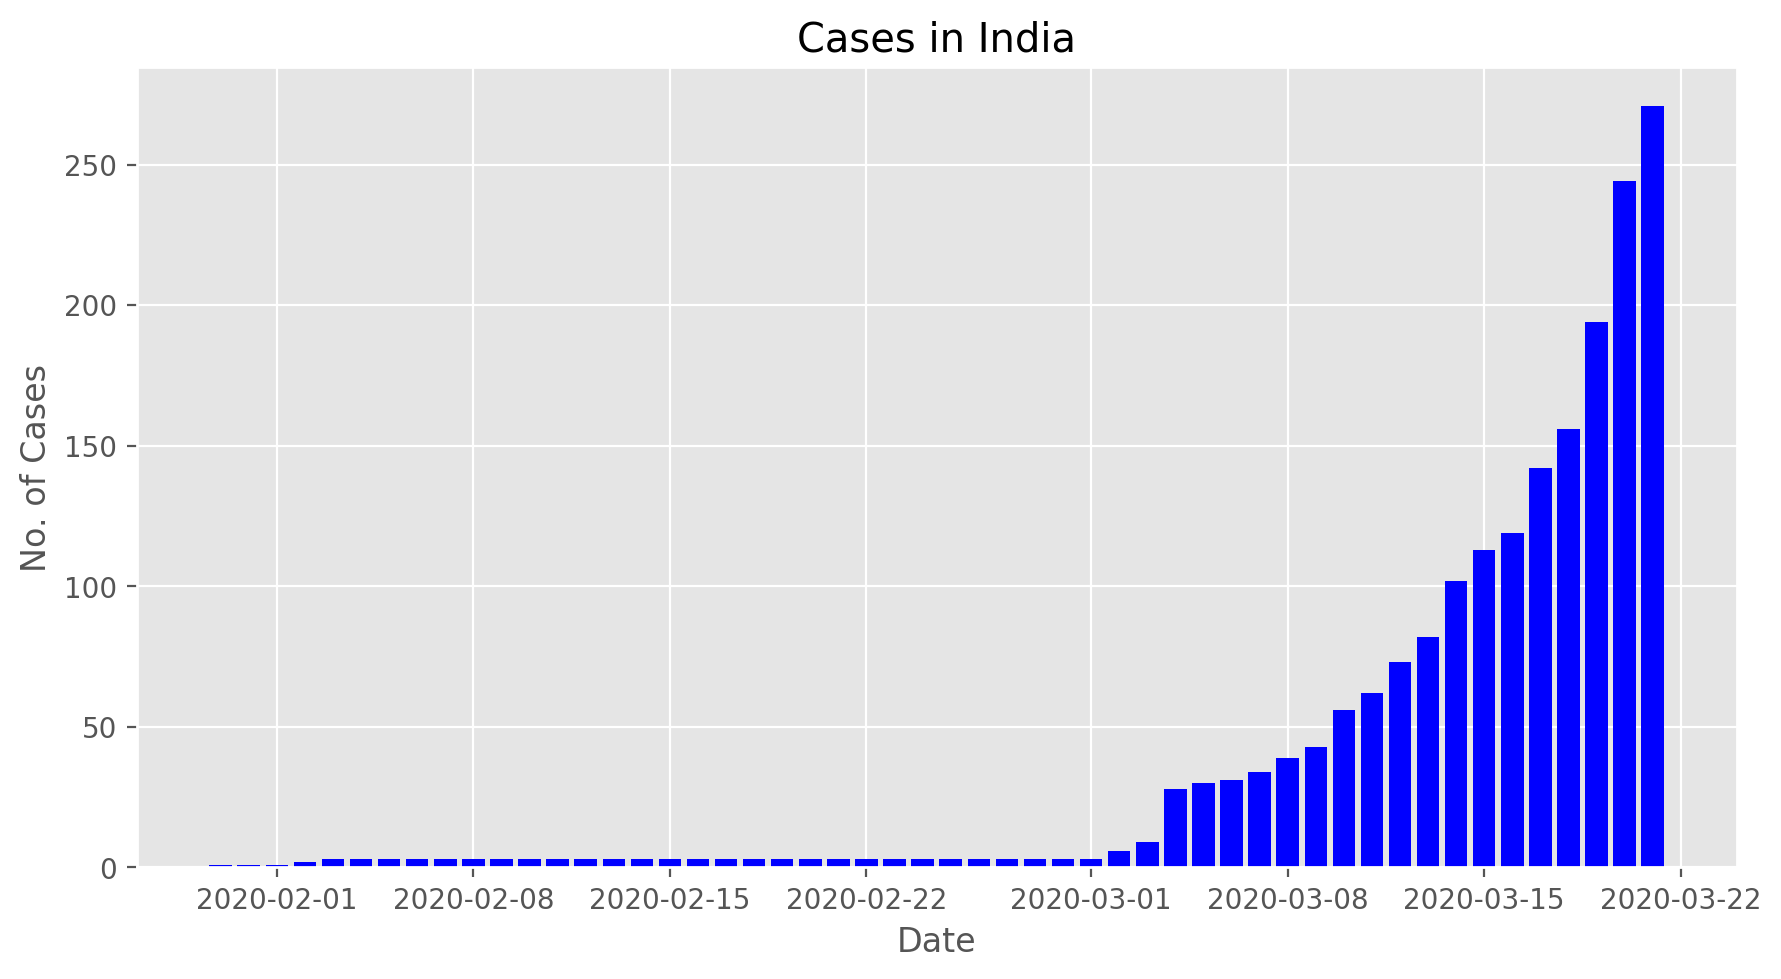

In [40]:
fig = plt.figure(figsize=(10,5), dpi = 200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(perday1['Date'], perday1['Total Cases'], color = 'blue')
axes.set_xlabel('Date')
axes.set_ylabel('No. of Cases')
axes.set_title('Cases in India')
plt.show()

#### plotly 

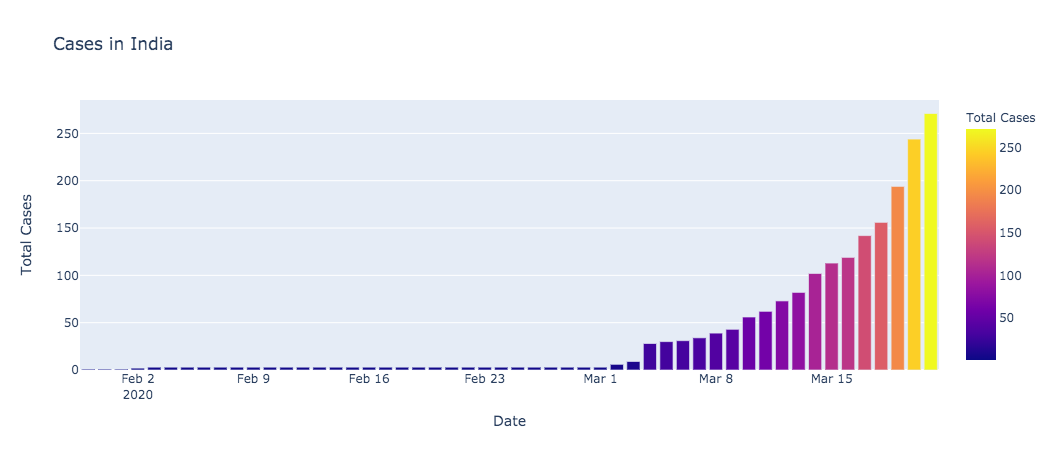

In [41]:
fig = px.bar(perday1,x = 'Date', y = 'Total Cases',color = 'Total Cases', title= 'Cases in India')
fig.show()

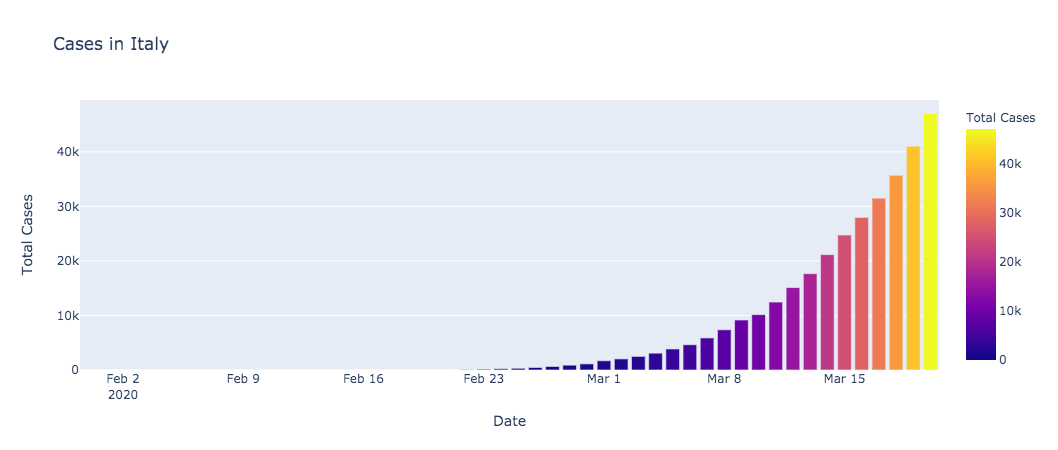

In [42]:
fig1 = px.bar(perday2,x = 'Date', y = 'Total Cases',color = 'Total Cases', title= 'Cases in Italy')
fig1.show()

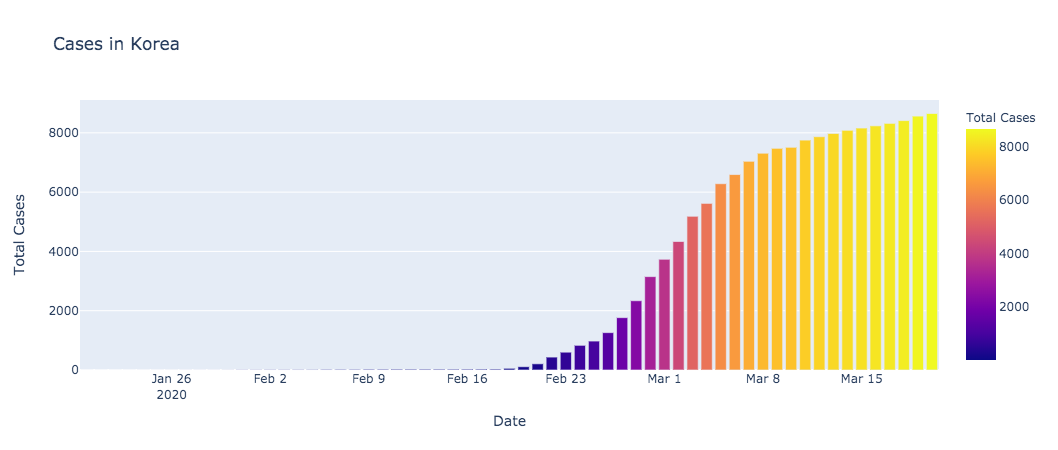

In [43]:
fig2 = px.bar(perday3,x = 'Date', y = 'Total Cases',color = 'Total Cases', title= 'Cases in Korea')
fig2.show()

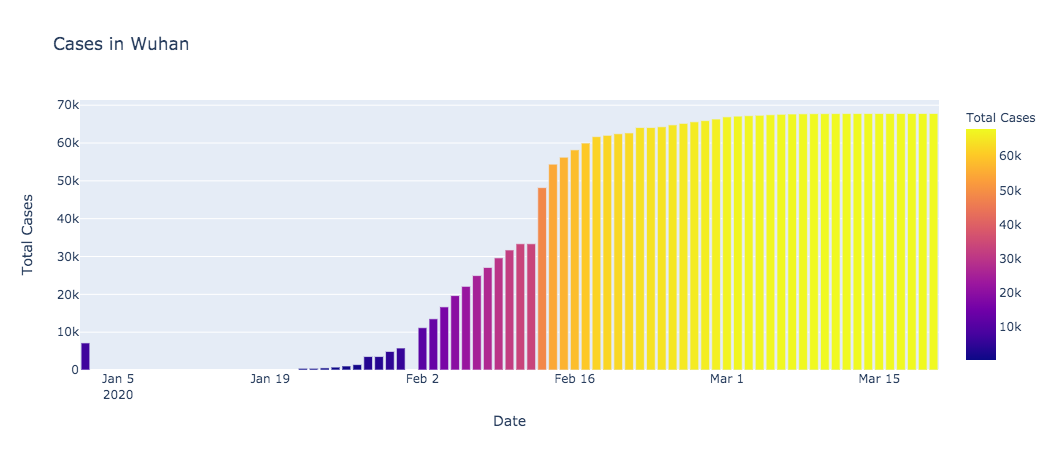

In [44]:
fig3 = px.bar(perday4,x = 'Date', y = 'Total Cases',color = 'Total Cases', title= 'Cases in Wuhan')
fig3.show()

## Scatter plot

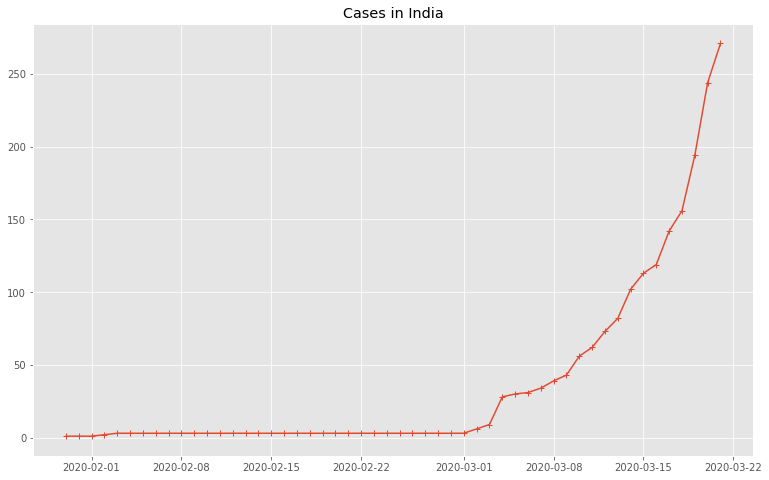

In [45]:
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0,0,1,1])
axes.plot(perday1['Date'], perday1['Total Cases'], marker='+')
#if you do axes.plot : line will be drawn
axes.set_title('Cases in India')

plt.show()

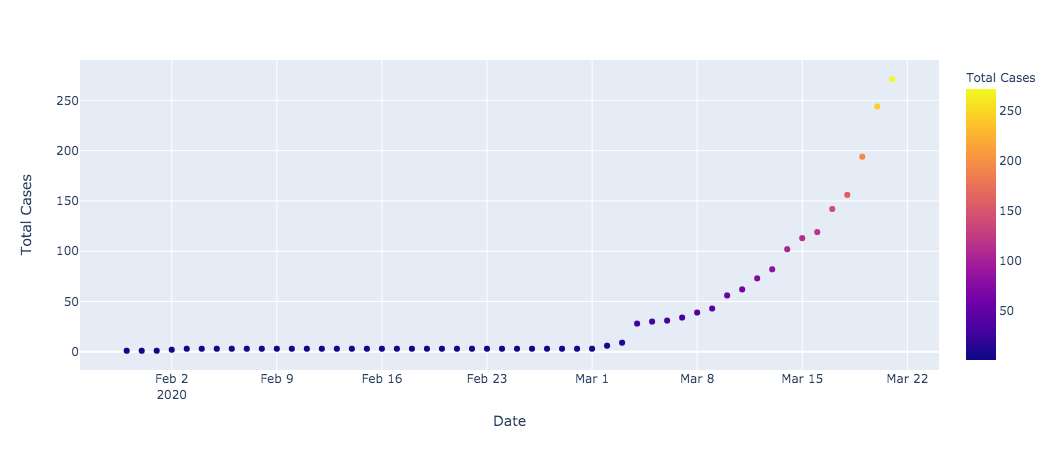

In [46]:
#plotly_express
fig = px.scatter(perday1, x = 'Date', y = 'Total Cases', color ='Total Cases')
fig

#### plotly iplot

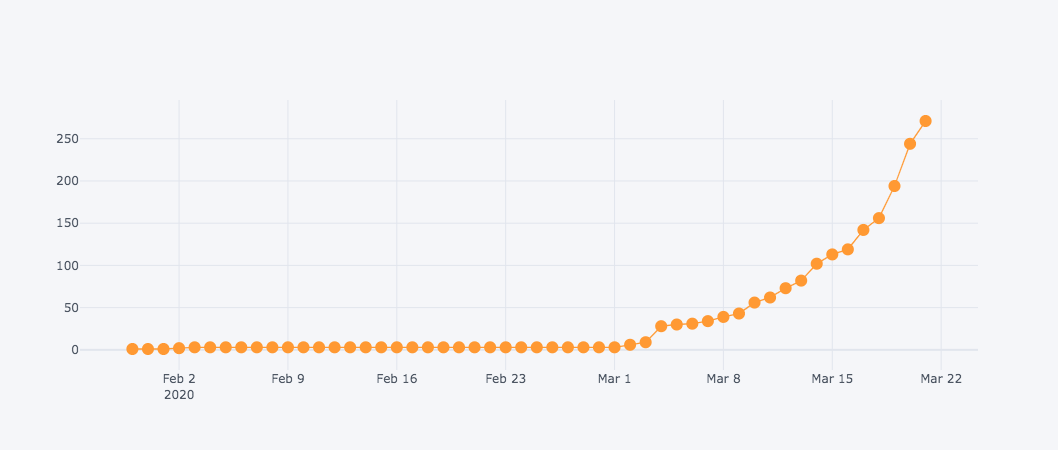

In [47]:
perday1.iplot(kind = 'scatter', x = 'Date', y = 'Total Cases',mode = 'lines+markers')

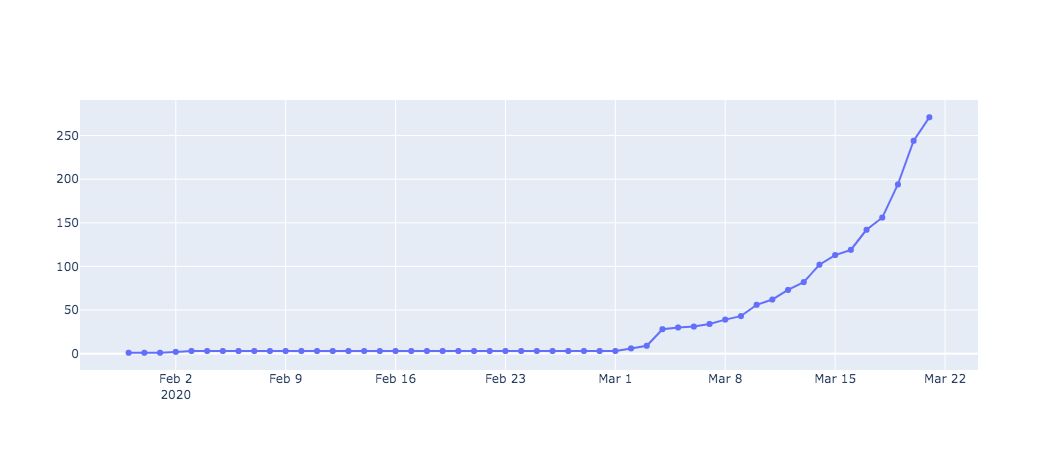

In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = perday1['Date'], y = perday1['Total Cases'], mode = 'lines+markers'))

## Subplot

In [49]:
from plotly.subplots import make_subplots

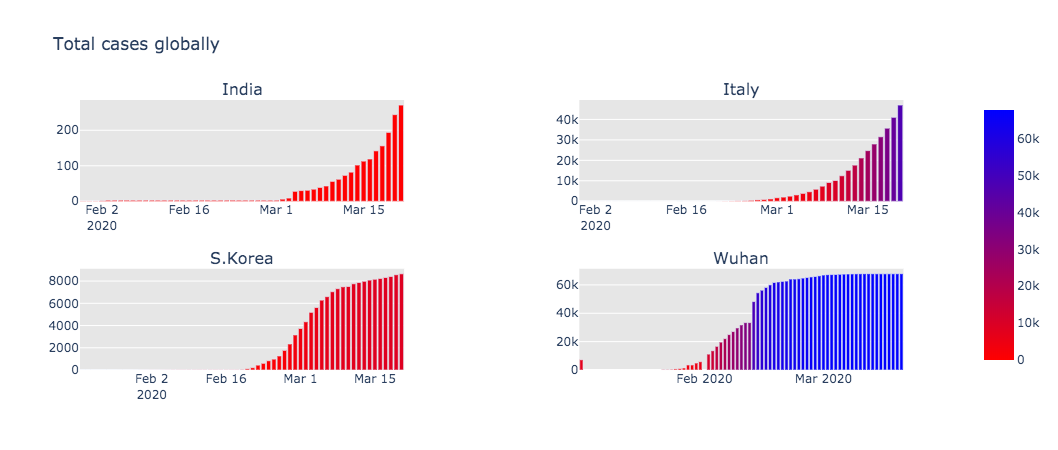

In [50]:
fig = make_subplots(rows = 2, cols=2,
         specs = [[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
         subplot_titles=('India','Italy','S.Korea','Wuhan'))

fig.add_trace(go.Bar(x = perday1['Date'], y = perday1['Total Cases'], 
                     marker = dict(color = perday1['Total Cases'], coloraxis= 'coloraxis')),1,1)

fig.add_trace(go.Bar(x = perday2['Date'], y = perday2['Total Cases'], 
                     marker = dict(color = perday2['Total Cases'], coloraxis= 'coloraxis')),1,2)

fig.add_trace(go.Bar(x = perday3['Date'], y = perday3['Total Cases'], 
                     marker = dict(color = perday3['Total Cases'], coloraxis= 'coloraxis')),2,1)

fig.add_trace(go.Bar(x = perday4['Date'], y = perday4['Total Cases'], 
                     marker = dict(color = perday4['Total Cases'], coloraxis= 'coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend = False, title_text = 'Total cases globally')
fig.update_layout(plot_bgcolor = 'rgb(230,230,230)')

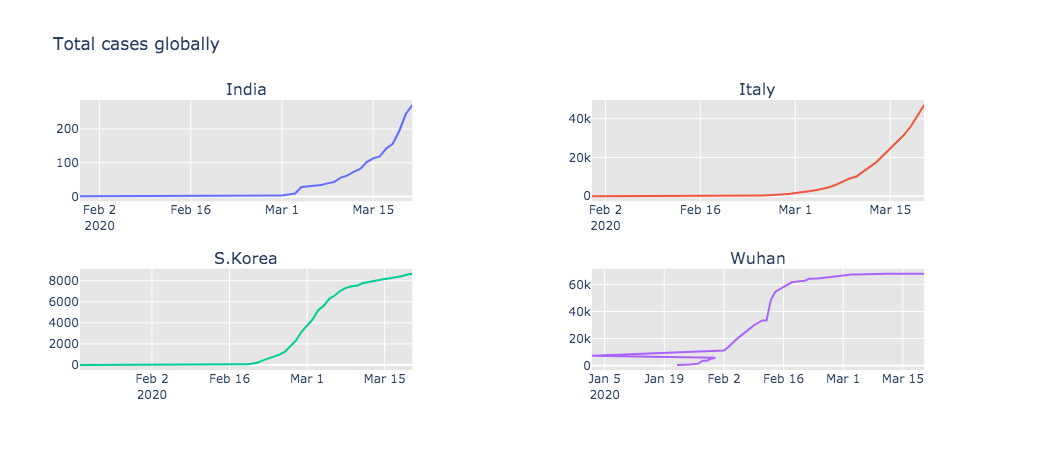

In [51]:
fig = make_subplots(rows = 2, cols=2,
         specs = [[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]],
         subplot_titles=('India','Italy','S.Korea','Wuhan'))

fig.add_trace(go.Scatter(x = perday1['Date'], y = perday1['Total Cases'], 
                     marker = dict(color = perday1['Total Cases'], coloraxis= 'coloraxis')),1,1)

fig.add_trace(go.Scatter(x = perday2['Date'], y = perday2['Total Cases'], 
                     marker = dict(color = perday2['Total Cases'], coloraxis= 'coloraxis')),1,2)

fig.add_trace(go.Scatter(x = perday3['Date'], y = perday3['Total Cases'], 
                     marker = dict(color = perday3['Total Cases'], coloraxis= 'coloraxis')),2,1)

fig.add_trace(go.Scatter(x = perday4['Date'], y = perday4['Total Cases'], 
                     marker = dict(color = perday4['Total Cases'], coloraxis= 'coloraxis')),2,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend = False, title_text = 'Total cases globally')
fig.update_layout(plot_bgcolor = 'rgb(230,230,230)')

## WorldMap Analysis

In [52]:
df3 = pd.read_csv('covid_19_data.csv', parse_dates = ['Last Update'])

In [53]:
df3.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [54]:
df3.rename(columns = {'ObservationDate':'Date', 'Country/Region':'Country'}, inplace = True)

In [55]:
df3.head(2)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0


In [56]:
df3.query('Deaths >= 1000').head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
1195,1196,02/11/2020,Hubei,Mainland China,2020-02-11 23:33:02,33366.0,1068.0,2639.0
1268,1269,02/12/2020,Hubei,Mainland China,2020-02-12 14:13:08,33366.0,1068.0,2686.0
1341,1342,02/13/2020,Hubei,Mainland China,2020-02-13 14:13:06,48206.0,1310.0,3459.0
1415,1416,02/14/2020,Hubei,Mainland China,2020-02-14 23:33:02,54406.0,1457.0,4774.0
1490,1491,02/15/2020,Hubei,Mainland China,2020-02-15 23:13:05,56249.0,1596.0,5623.0


In [57]:
df3.query('Country == "UK"').head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
481,482,01/31/2020,NaN,UK,2020-01-31 23:59:00,2.0,0.0,0.0
541,542,02/01/2020,NaN,UK,2020-02-01 01:52:00,2.0,0.0,0.0
611,612,02/02/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
678,679,02/03/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0
746,747,02/04/2020,NaN,UK,2020-02-01 01:52:40,2.0,0.0,0.0


In [58]:
df3.groupby('Date').sum()

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [59]:
confirmed = df3.groupby('Date')['Confirmed'].sum().to_frame().reset_index()
deaths = df3.groupby('Date')['Deaths'].sum().to_frame().reset_index()
recovered = df3.groupby('Date')['Recovered'].sum().to_frame().reset_index()

In [60]:
confirmed.head(2)

,Date,Confirmed
0,01/22/2020,555.0
1,01/23/2020,653.0


In [61]:
deaths.head(2)

,Date,Deaths
0,01/22/2020,17.0
1,01/23/2020,18.0


In [62]:
recovered.head(2)

,Date,Recovered
0,01/22/2020,28.0
1,01/23/2020,30.0


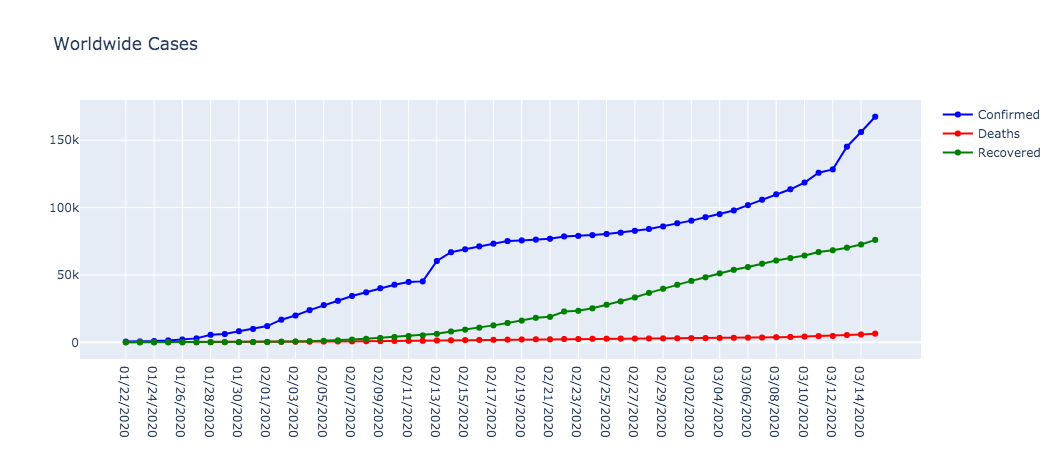

In [63]:
fig = go.Figure()
fig.update_layout(title = 'Worldwide Cases')
fig.add_trace(go.Scatter(x = confirmed['Date'], y = confirmed['Confirmed'], mode = 'lines+markers',name = 'Confirmed', line = dict(color ='blue')))
fig.add_trace(go.Scatter(x = deaths['Date'], y = deaths['Deaths'], mode = 'lines+markers', name = 'Deaths', line = dict(color = 'red')))
fig.add_trace(go.Scatter(x = recovered['Date'], y = recovered['Recovered'], mode = 'lines+markers', name = 'Recovered', line = dict(color = 'green')))

In [64]:
df_new_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv') 

In [65]:
df_new_confirmed.rename(columns = {'Country/Region':'Country'}, inplace = True)

In [66]:
df_latlong = pd.merge(df3, df_new_confirmed, on = ['Country', 'Province/State'])

In [67]:
df_latlong.head(2)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572


In [68]:
fig = px.density_mapbox(df_latlong,lat='Lat', lon='Long', hover_name='Province/State', hover_data=['Confirmed', 'Deaths', 'Recovered'], animation_frame='Date', color_continuous_scale='Portland', radius = 7, height=700, zoom=0)
fig.update_layout(title = 'World wide Corona virus Update')
fig.update_layout(mapbox_style = 'open-street-map', mapbox_center_lon = 0)
fig.update_layout(margin = {'r':0, 't':0, 'b':0})